# Pymaceuticals Inc.
---

### Analysis
#### Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

Observations from the data:
1. For mice on the Capomulin regimen, there is a strong positive correlation between Avg. Tumor Volume and Mouse Weight with a correlation coefficient of 0.84.
2. Based on the boxplot, mice on the Capomulin and Ramicane regimens had the lowest tumor volumes at the end of their timepoints (typically 45 days).
3. Both Capumulin and Ramican drugs had the most timepoint observations, 230 and 228 respectively.
4. Based on the pie chart, the study was performed relatively equitably across male and female mice, with 51% and 49% respectively.
5. Among the four drugs (Capomulin, Ramicane, Infubinol, Ceftamin), Infubinol was the only drug to have a possible outlier.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
import random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata.head()
# study_results.head()

In [2]:
# Combine the data into a single DataFrame
mouseid_merge_df = pd.merge(mouse_metadata,study_results, on=('Mouse ID'))
mouseid_merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Display the data table for preview
mouseid_merge_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
unique_mice = mouseid_merge_df['Mouse ID'].nunique()
print("Unique mice count is: ", unique_mice)

Unique mice count is:  249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_timepoint_id = mouseid_merge_df[mouseid_merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_timepoint_id.head()
row_count = len(duplicate_timepoint_id)
print('# of duplicates is :', row_count)

# of duplicates is : 10


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_timepoint_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseid_data = mouseid_merge_df[mouseid_merge_df['Mouse ID'] == 'g989']
duplicate_mouseid_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouseid_df = mouseid_merge_df[mouseid_merge_df['Mouse ID'] != 'g989']
clean_mouseid_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
unique_mice_2 = clean_mouseid_df['Mouse ID'].nunique()
# clean_mouseid_df.columns
print("Unique mice count after removing the Mouse ID (g989) because it duplicate Timepoint values: ", unique_mice_2)

Unique mice count after removing the Mouse ID (g989) because it duplicate Timepoint values:  248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [11]:
# Create group by for 'Drug Regimen' by 'Tumor Volume'
grouped_regimen = clean_mouseid_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
grouped_regimen.describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [12]:
# Get the mean, median, variance, standard deviation, and SEM by Drug Regimen
regimen_summary = pd.DataFrame({
    'Mean Tumor Volume': clean_mouseid_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': clean_mouseid_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
    'Tumor Variance Volume': clean_mouseid_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
    'Tumor Volume Standard Deviation': clean_mouseid_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
    'Tumor Standard Error of Mean (SEM)': clean_mouseid_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance Volume,Tumor Volume Standard Deviation,Tumor Standard Error of Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [14]:
# Create a data frame using one line of code w/ aggregation method
regimen_aggregation = grouped_regimen.agg(['mean', 'median', 'var', 'std', 'sem'])
regimen_aggregation 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: count, dtype: int64


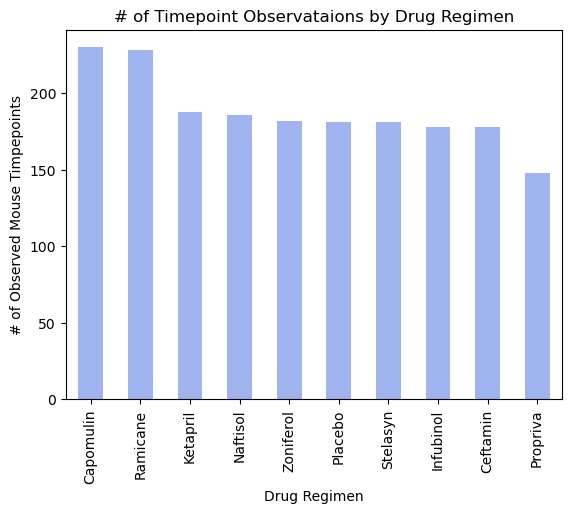

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_by_regimen = clean_mouseid_df['Drug Regimen'].value_counts()
rows_by_regimen.plot(kind='bar', color='royalblue', alpha=0.5, align='center')

# Chart Title and Labels
plt.title('# of Timepoint Observataions by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpepoints')

print(rows_by_regimen.head())

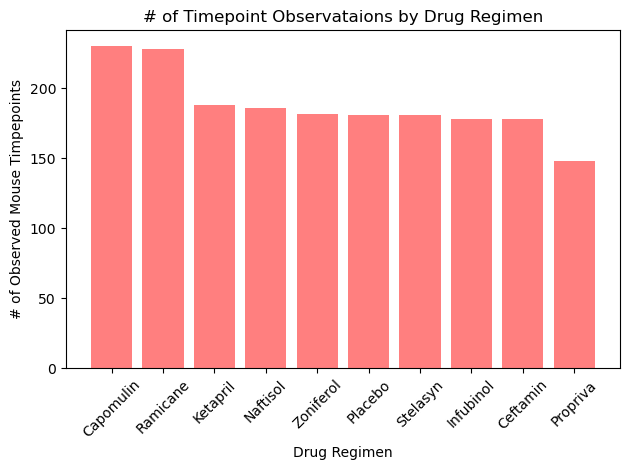

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(rows_by_regimen.index, rows_by_regimen.values, color='red', alpha=0.5, align="center")

# Chart Title and Labels
plt.title('# of Timepoint Observataions by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpepoints')
plt.xticks(rotation=45) 
plt.tight_layout()  


Text(0.5, 1.0, 'Mice Sex _ Pyplot Pie')

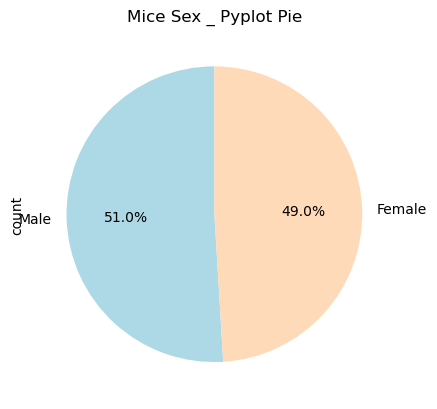

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Define variables for pie chart
rows_by_sex = clean_mouseid_df['Sex'].value_counts()
colors = ['lightblue', 'peachpuff']

# Create Pier chart with pandas
rows_by_sex.plot(kind='pie', 
                 colors=colors, 
                 autopct='%1.1f%%', 
                 startangle=90)

# Create Title
plt.title('Mice Sex _ Pyplot Pie')


Text(0.5, 1.0, 'Mice Sex _ Panda Pie')

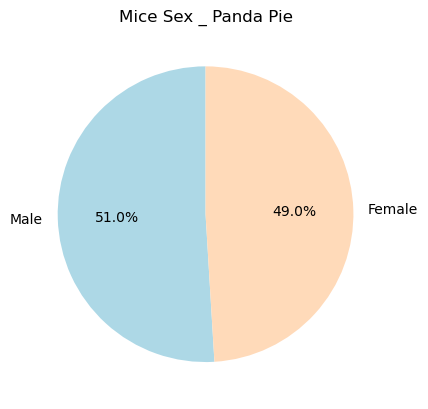

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Define variables for pie chart
rows_by_sex = clean_mouseid_df['Sex'].value_counts()
rows_by_sex #Show value by Sex
colors_1 = ['lightblue', 'peachpuff']

# Create Pie chart w/ pyplt
plt.pie(rows_by_sex.values, 
        labels=rows_by_sex.index, 
        colors=colors, 
        autopct="%1.1f%%", 
        shadow=False, 
        startangle=90);

# Create Title
plt.title('Mice Sex _ Panda Pie')

## Quartiles, Outliers and Boxplots

In [19]:
# Moving clean df to CSV file to review and help dubug
output_path = os.path.join('data', 'clean_mouseid_df.csv')
clean_mouseid_df.to_csv(output_path, index=False)


In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [21]:
# Making a copy of main df
clean_copy_df = clean_mouseid_df.copy()
clean_copy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Filtering for the 4 drugs we want to analyze
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selected_drug_df = clean_copy_df[clean_copy_df['Drug Regimen'].isin(drugs_list)]
selected_drug_df.set_index('Mouse ID', inplace=True)
selected_drug_df.head(10)


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
k403,Ramicane,Male,21,16,25,33.464577,1
k403,Ramicane,Male,21,16,30,31.099498,1
k403,Ramicane,Male,21,16,35,26.546993,1
k403,Ramicane,Male,21,16,40,24.365505,1


In [40]:
# Creating a for loop for Max Timepoint
max_timepoints = []

# For loop for unique combination of Mouse ID and Drug Regimen using groupby
for (mouse_id, drug_regimen), group_n in selected_drug_df.groupby(['Mouse ID', 'Drug Regimen']):
    max_timepoint = group_n['Timepoint'].max()
    tumor_volume_at_max_timepoint = group_n.loc[group_n['Timepoint'] == max_timepoint, 'Tumor Volume (mm3)'].values[0]
    other_columns_at_max_timepoint = group_n.loc[group_n['Timepoint'] == max_timepoint, ['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites']].values[0]
    max_timepoints.append((mouse_id, drug_regimen, max_timepoint, tumor_volume_at_max_timepoint, *other_columns_at_max_timepoint))

# Create new DataFrame (I know I'm not merging, but this made sense to me since I didn't want non Maxpoint values in my new data set.)
max_timepoints_df = pd.DataFrame(max_timepoints, columns=['Mouse ID', 'Drug Regimen', 'Max Timepoint', 'Tumor Volume (mm3)', 'Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
max_timepoints_df = max_timepoints_df.reset_index(drop=True)
max_timepoints_df.head(15)

,Mouse ID,Drug Regimen,Max Timepoint,Tumor Volume (mm3),Sex,Age_months,Weight (g),Metastatic Sites
0,a203,Infubinol,45,67.973419,Female,20,23,2
1,a251,Infubinol,45,65.525743,Female,21,25,1
2,a275,Ceftamin,45,62.999356,Female,20,28,3
3,a411,Ramicane,45,38.407618,Male,3,22,1
4,a444,Ramicane,45,43.047543,Female,10,25,0
5,a520,Ramicane,45,38.810366,Male,13,21,1
6,a577,Infubinol,30,57.031862,Female,6,25,2
7,a644,Ramicane,45,32.978522,Female,7,17,1
8,a685,Infubinol,45,66.083066,Male,8,30,3
9,b128,Capomulin,45,38.982878,Female,9,22,2


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

In [32]:
# List by drug regimen and corresponding and empty drug stats list

# Set up
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_stats_list = []
tumor_volume_data = {}

for drug in drugs_list:
    # Add tumor volume data by drug into tumor_volume_data
    tumor_volume_data[drug] = max_timepoints_df[max_timepoints_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Calculate Quartiles, IQR, and Outliers
    quartiles = tumor_volume_data[drug].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    median = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = tumor_volume_data[drug][(tumor_volume_data[drug] < lower_bound) | (tumor_volume_data[drug] > upper_bound)]
    
    # Append 
    drug_stats_list.append({'Drug Regimen': drug,
                            'Lower Quartile': lowerq,
                            'Median': median,
                            'Upper Quartile': upperq,
                            'IQR': iqr,
                            'Lower Bound': lower_bound,
                            'Upper Bound': upper_bound,
                            'Potential Outliers': outliers})
    
drug_stats = pd.DataFrame(drug_stats_list)
drug_stats.head()

,Drug Regimen,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound,Potential Outliers
0,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,"Series([], Name: Tumor Volume (mm3), dtype: fl..."
1,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,"Series([], Name: Tumor Volume (mm3), dtype: fl..."
2,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,"15 36.321346 Name: Tumor Volume (mm3), dtyp..."
3,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,"Series([], Name: Tumor Volume (mm3), dtype: fl..."


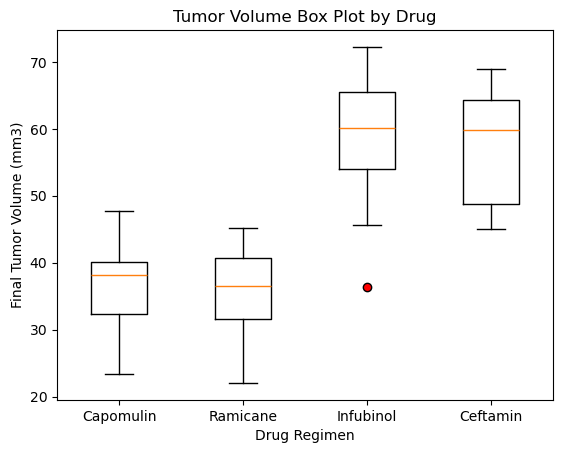

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Setup 
boxplot_data = [tumor_volume_data[drug].values for drug in drugs_list]
outlier_point = {'markerfacecolor': 'red'}

#Box Plot
plt.boxplot(boxplot_data, 
            labels=drugs_list, 
            flierprops=outlier_point)

# Title, labels, and aesthetics
plt.title('Tumor Volume Box Plot by Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(False)
plt.show()

## Line and Scatter Plots

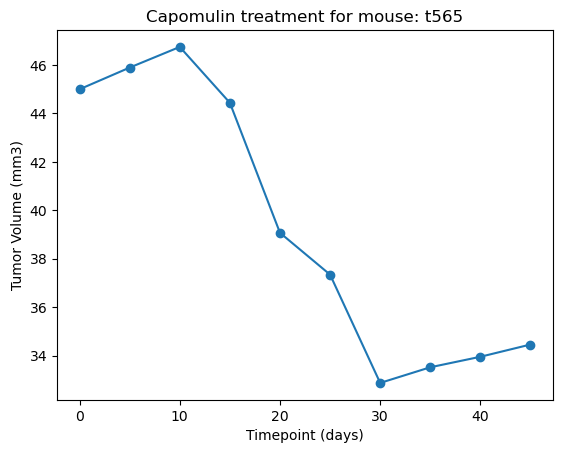

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Added Import Random 

#  Setup to pull random mouse on Capomulin
capomulin_mice = clean_copy_df[clean_copy_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
random_mouse_id = random.choice(capomulin_mice)
mouse_data = clean_copy_df[(clean_copy_df['Mouse ID'] == random_mouse_id) & (clean_copy_df['Drug Regimen'] == 'Capomulin')]

#Plot Line
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], 
         marker='o', 
         linestyle='-')

# Title, labels, and aesthetics
plt.title(f'Capomulin treatment for mouse: {random_mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)


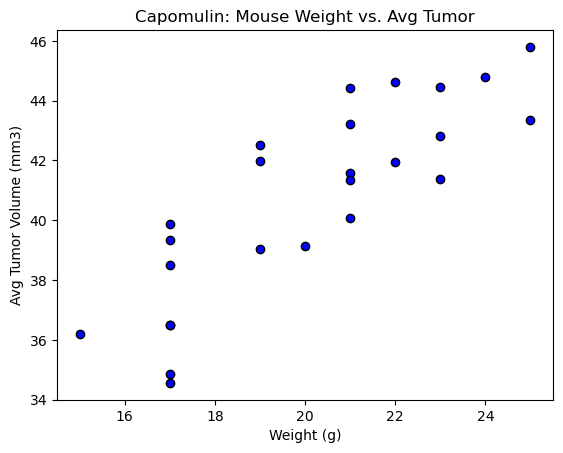

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_copy_df[clean_copy_df['Drug Regimen'] == 'Capomulin']
mouse_weight_x = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
avg_tumor_volume_y = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(mouse_weight_x, avg_tumor_volume_y, 
            marker='o', 
            facecolors='blue', 
            edgecolors='black')

# Title, labels, and aesthetics
plt.title('Capomulin: Mouse Weight vs. Avg Tumor')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.grid(False)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


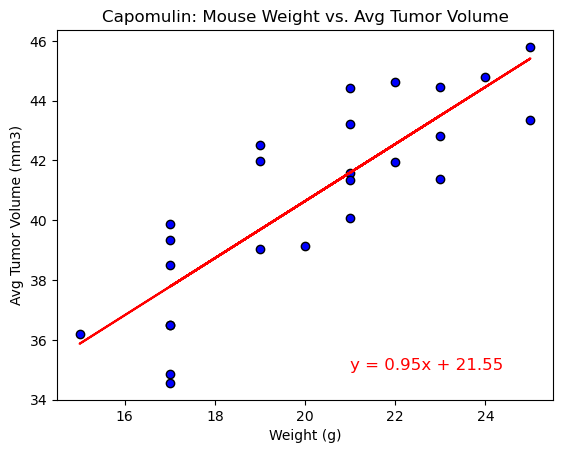

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Added 'from scipy.stats import linregress'

# Correlation 
correlation = st.pearsonr(mouse_weight_x, avg_tumor_volume_y)

# Linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(mouse_weight_x, avg_tumor_volume_y)
regress_values = mouse_weight_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter Plot
plt.scatter(mouse_weight_x, avg_tumor_volume_y, 
            marker='o', 
            facecolors='blue', 
            edgecolors='black')

plt.plot(mouse_weight_x,regress_values,"r-")
plt.annotate(line_eq,(21,35),
             fontsize=12,
             color="red")

# Title, labels, and aesthetics
plt.title('Capomulin: Mouse Weight vs. Avg Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.grid(False)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")